In [26]:
import      numpy               as      np
import      matplotlib.pyplot   as      plt
from        lib_Experimentum    import  *
from        Alessandria         import  *
import      configparser
inputs = configparser.ConfigParser()

#path dove stanno i dati del fit
spectra_path =   '../BRILLOUIN/TDP43/ARS_13_02/'
spectra_filename    =   'ARS_13_02'
analysis_dir     =   'analysis_nodelta_better_prova'
now_path         =   spectra_path+analysis_dir+'/'
with open(now_path+'config.ini', 'r') as f:
    inputs.read_file(f)
### recupero info su dimensionalità
n_rows    =     inputs.getint('I/O', 'n_rows')
n_cols    =     inputs.getint('I/O', 'n_cols')
###
matrix, rows, cols = Initialize_Matrix(0,0,n_rows,n_cols)

Ho inizializzato una matrice 89x85, per un totale di 7565 spettri


In [27]:

#1) Recupero info su posizioni + info su chi è bono e chi no e su VIPA (questo solo per matrix[0][0])

with open(now_path+'xy.txt', 'r') as fin:
    lines = fin.readlines()[1:]

excluded = ()

with open(now_path+'markov_fit.txt', 'r') as fin:
    fit     =   eval(fin.read())
_,_,_, boni = Unpack_Fit(fit)

with open(now_path+'xy_VIPA.txt', 'r') as fin:
    VIPAs = fin.readlines()[1:]

x_VIPA = np.array(VIPAs[0][1:-2].split(), dtype=float)
y_VIPA = np.array(VIPAs[1][1:-2].split(), dtype=float)

x = np.load(now_path+'x.npy', allow_pickle = True)
y = np.load(now_path+'y.npy', allow_pickle = True)

count = 0
for ii in range(n_rows):
    for jj in range (n_cols):
        matrix[ii][jj].Recover_VIPA(x_VIPA, y_VIPA)
        matrix[ii][jj].Recover_Spectrum(x[count],y[count])    
        count+=1
        if (ii,jj) not in boni:
            excluded = excluded +((ii,jj),)
        
if count != (n_rows*n_cols): raise ValueError('Incompatibile')
print('Ok ho recuperato le informazioni sulle posizioni')

Ok ho recuperato le informazioni sulle posizioni


In [28]:
count

7565

In [29]:
Plot_Elements_Spectrum(matrix,[(1,1)], pix = True)

(1, 1)


AttributeError: 'Spectrum' object has no attribute 'x'

In [ ]:
for (ii,jj) in np.ndindex((n_rows, n_cols)):
    print(matrix[ii][jj].x_freq[0:4])
    print(str((ii,jj))+'ao so '+str(len(matrix[ii][jj].x_freq)))

In [ ]:
#2) Acquisico i dati prodotti dal fit markoviano


##################### MARKOVIANO

with open(now_path+'y_markov_fit.txt', 'r') as fin:
    y_fits = fin.readlines()

with open(now_path+'cost_markov.txt', 'r') as fin:
    costi = fin.readlines()

with open(now_path+'markov_fit_params.txt', 'r') as fin:
    lines   =   fin.readlines()

if (len(boni) != len(lines)):
    raise ValueError("Incompatibilità tra lunghezza boni ({}) e informazioni parametri fit ({})".format(len(boni), len(lines)))
if (len(boni) != len(costi)):
    raise ValueError("Incompatibilità tra lunghezza boni ({}) e informazioni costo fit ({})".format(len(boni), len(costi)))
if (len(boni) != len(y_fits)):
    raise ValueError("Incompatibilità tra lunghezza file parametri ({}) e y fit ({})".format(len(boni), len(y_fits)))


for (line, y_fit, cost, (ii,jj)) in zip(lines, y_fits, costi,  boni) :
#for (line, cost, (ii,jj)) in zip(lines, costi,   boni) :
    matrix[ii][jj].Recover_Markov_Fit_Params(line)
    matrix[ii][jj].Recover_y_markov_fit(np.array(y_fit[1:-2].split(), dtype = float))
    matrix[ii][jj].Recover_cost_markov(float(cost))

print('Ok ho recuperato le informazioni del Fit Markoviano')




Completata Parameter_Map per Omega
Ho trovato 15 elementi saturati


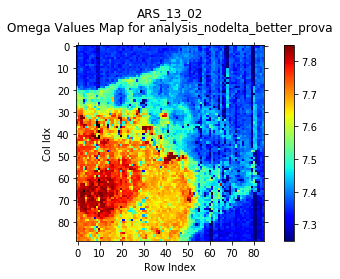

Completata Parameter_Map per Omega
Ho trovato 15 elementi saturati


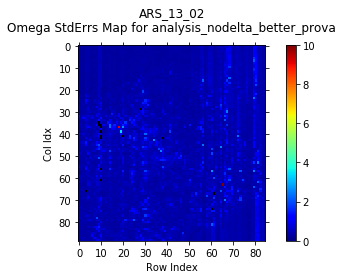

Completata Parameter_Map per Gamma
Ho trovato 15 elementi saturati


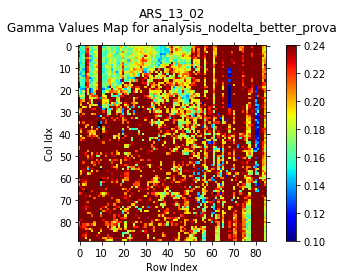

Completata Parameter_Map per Gamma
Ho trovato 15 elementi saturati


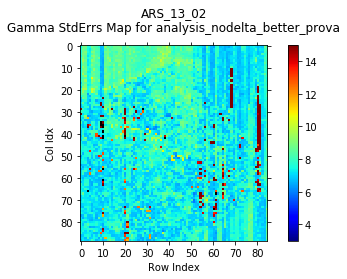

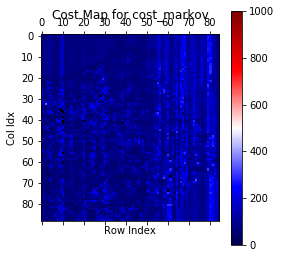

In [32]:
#MAPPE
omega_markov_map, _ = Get_Parameter_Map('markov', 'Omega', matrix, n_rows, n_cols, excluded, 'jet', 7.25, 7.85, analysis_dir, spectra_filename, fig = 'omega_markov_map', path=now_path)
Delta_omega_markov_map, _ = Get_Parameter_Map('markov', 'Omega', matrix, n_rows, n_cols, excluded, 'jet', 0,10, analysis_dir, spectra_filename ,fig = 'Delta_omega_markov_map', path=now_path, Deltas = True)
gamma_markov_map, _ = Get_Parameter_Map('markov', 'Gamma', matrix, n_rows, n_cols, excluded, 'jet', 0.1,0.24,analysis_dir, spectra_filename ,fig = 'Gamma_markov_map', path=now_path)
Delta_gamma_markov_map, _ = Get_Parameter_Map('markov', 'Gamma', matrix, n_rows, n_cols, excluded, 'jet', 3, 15, analysis_dir, spectra_filename, fig = 'Delta_Gamma_markov_map', path=now_path, Deltas = True)
markov_cost_map = Get_cost_map(matrix, 'markov', len(rows), len(cols), 'markov_cost_map', path = now_path)

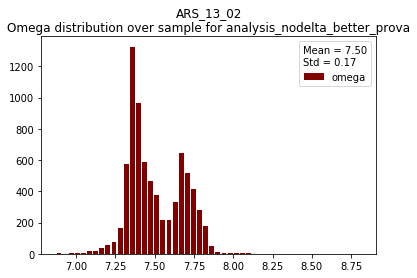

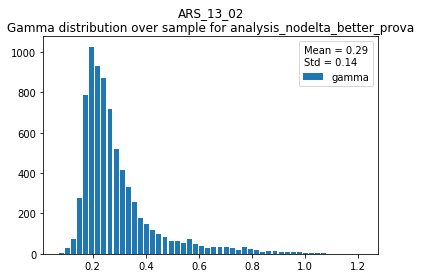

In [5]:
#HISTOGRAMs - MARKOV
markov_Omegas = np.array([matrix[ii][jj].Markov_Fit_Params['Omega'].values[0] for (ii,jj) in boni])
markov_Gammas =  np.array([matrix[ii][jj].Markov_Fit_Params['Gamma'].values[0] for (ii,jj) in boni])


plt.figure()
plt.title('{}\nOmega distribution over sample for {}'.format(spectra_filename, analysis_dir), pad = 5.)
_ = plt.hist(markov_Omegas, bins = 50, label = 'omega',histtype = 'bar', stacked = True, rwidth= 0.8,  color = 'maroon')
plt.legend(title='Mean = {:3.2f}\nStd = {:3.2f}'.format(np.mean(markov_Omegas), np.std(markov_Omegas)))
plt.savefig(now_path+'Omega_markov_distribution.pdf', format = 'pdf', bbox_inches='tight')
plt.show()
plt.close()
plt.figure()
plt.title('{}\nGamma distribution over sample for {}'.format(spectra_filename, analysis_dir), pad = 5.)
_ = plt.hist(markov_Gammas, bins = 50, label = 'gamma', histtype = 'bar', stacked = True, rwidth= 0.8)
plt.legend(title='Mean = {:3.2f}\nStd = {:3.2f}'.format(np.mean(markov_Gammas), np.std(markov_Gammas)))
plt.savefig(now_path+'Gamma_markov_distribution.pdf', format = 'pdf', bbox_inches='tight')
plt.show()
plt.close()


In [8]:
#Parametri di Interesse per analisi
markov_too_bad = ()
markov_too_good  = ()
markov_omega_too_high =  ()
markov_gamma_too_bad = ()

markov_omega_max = np.mean(markov_Omegas)+3*np.std(markov_Omegas)
markov_gamma_max = np.mean(markov_Gammas)+3*np.std(markov_Gammas)
cost_max = 1000
cost_min = 50


markov_too_bad = Get_Bad_Elements(matrix, boni, cost_max, fit = 'markov')
markov_too_good = Get_Good_Elements(matrix, boni, cost_min, fit = 'markov')
markov_omega_too_high = Whose_Param_Too_High('Omega', markov_omega_max, 'markov', matrix, boni)
markov_gamma_too_high = Whose_Param_Too_High('Gamma', markov_gamma_max, 'markov', matrix, boni)


#aggiunte 
markov_too_offset = ()
percentage_gamma = 15
max_offset = 30
markov_almost_height = ()

for (ii,jj) in boni:
    if matrix[ii][jj].Markov_Fit_Params.T.StdErrs['Gamma'] > (matrix[ii][jj].Markov_Fit_Params.T.Values['Gamma']*(percentage_gamma/100)):
        markov_gamma_too_bad += ((ii,jj),)
    if matrix[ii][jj].Markov_Fit_Params['offset'].values[0] > max_offset:
        markov_too_offset += ((ii,jj),)
    if matrix[ii][jj].y.max() > 15000:
        markov_almost_height += ((ii,jj),)


print('\n\n\n\nHo trovato per i dati fit markov in {} :\n'.format(now_path))

print('{} elementi con chi quadro > {} '.format(len(markov_too_bad), cost_max))
print('{} elementi con chi quadro < {} \n'.format(len(markov_too_good), cost_min))


print('{} elementi con Omega > Omega max {:3.2f}'.format(len(markov_omega_too_high), markov_omega_max))
print('{} elementi con Gamma > Gamma max {:3.2f}\n'.format(len(markov_gamma_too_high), markov_gamma_max))

print('{} elementi con Gamma con errore percentuale > {} \n'.format(len(markov_gamma_too_bad), percentage_gamma))
print('{} elementi con offset > {} \n'.format(len(markov_too_offset), max_offset))





I found 0 bad elements out of 7550

I found 455 good elements out of 7550





Ho trovato per i dati fit markov in ../BRILLOUIN/TDP43/ARS_13_02/analysis_nodelta_better_prova/ :

0 elementi con chi quadro > 1000 
455 elementi con chi quadro < 50 

10 elementi con Omega > Omega max 8.01
204 elementi con Gamma > Gamma max 0.72

125 elementi con Gamma con errore percentuale > 15 

0 elementi con offset > 30 



In [62]:
nan = []

for (ii,jj) in boni:
    if np.isnan(matrix[ii][jj].Markov_Fit_Params['Omega']['StdErrs']):
        nan.append((ii,jj))
print(len(nan))

0


In [63]:
for ii in range(80, 88, 1):
    for jj in range (30,40, 1):
        if matrix[ii][jj].Markov_Fit_Params['Omega'].values[0] > 7.7:
            print(str((ii,jj)))

(82, 34)
(83, 34)
(83, 35)
(83, 36)
(84, 35)
(84, 36)
(84, 37)
(85, 36)
(85, 37)
(86, 31)
(87, 30)
(87, 31)


(40, 10)
                Co     Omega     Gamma             A         mu      sigma  \
Values    0.022681  7.655447  0.569072  2.112914e+02  11.617140  16.874434   
StdErrs   0.009478  0.065094  0.040468  3.290381e+08   4.384206  12.283493   
Initials  0.026048  7.603472  0.690205  2.641143e+02  11.502119  16.857577   

             shift    offset  
Values    0.038096  2.000000  
StdErrs   0.035113  1.742121  
Initials  0.227260  2.000000  


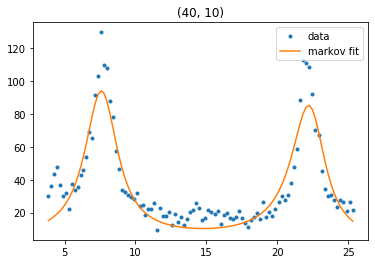

(43, 10)
                Co     Omega     Gamma             A         mu      sigma  \
Values    0.017776  7.731292  0.387419  2.165253e+02  10.627257  16.702232   
StdErrs   0.008987  0.042619  0.026960  4.706472e+08   6.448003  13.924709   
Initials  0.017069  7.756766  0.397384  1.804393e+02  10.522036  16.685546   

             shift    offset  
Values    0.262392  2.000000  
StdErrs   0.030280  0.897231  
Initials  0.218811  2.000000  


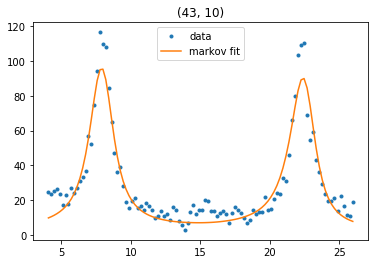

(44, 10)
                Co     Omega     Gamma             A         mu      sigma  \
Values    0.025368  7.610274  0.647811  2.079144e+02  10.840865  16.735653   
StdErrs   0.009045  0.072982  0.046387  3.119509e+08   4.650144  10.359334   
Initials  0.020636  7.753808  0.494137  1.732620e+02  10.733529  16.718934   

             shift    offset  
Values    0.025286  2.000000  
StdErrs   0.037697  2.048796  
Initials  0.270338  2.000000  


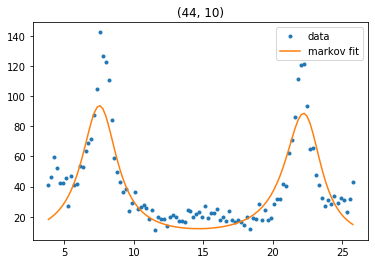

(45, 10)
                Co     Omega     Gamma             A         mu      sigma  \
Values    0.015234  7.760897  0.263179  9.030366e+01  10.519497  16.739304   
StdErrs   0.011745  0.030180  0.019375  1.418011e+08  10.684497  21.050724   
Initials  0.015156  7.766937  0.268553  1.125894e+02  10.415344  16.722581   

             shift    offset  
Values    0.019080  2.000000  
StdErrs   0.024395  0.650569  
Initials  0.219119  2.000000  


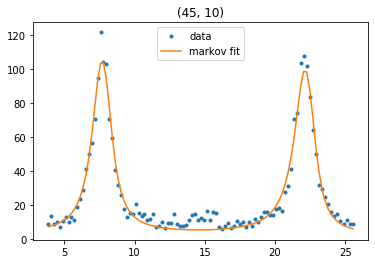

(46, 10)
                Co     Omega     Gamma             A         mu      sigma  \
Values    0.029808  7.483007  0.769878  2.558873e+02  11.286680  16.823794   
StdErrs   0.009419  0.089237  0.056992  3.377750e+08   3.436516   9.663761   
Initials  0.030883  7.499372  0.860958  2.132410e+02  11.174931  16.806987   

             shift    offset  
Values    0.257628  2.000000  
StdErrs   0.043948  2.819248  
Initials  0.252524  2.000000  


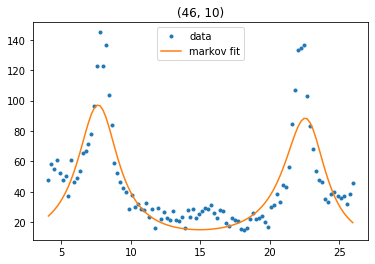

(47, 10)
                Co     Omega     Gamma             A         mu      sigma  \
Values    0.023425  7.665860  0.591872  1.532602e+02  10.959030  16.752355   
StdErrs   0.008653  0.063243  0.042106  2.037222e+08   4.634637  10.564636   
Initials  0.021539  7.681288  0.473828  1.277168e+02  10.850525  16.735620   

             shift    offset  
Values    0.042916  2.000000  
StdErrs   0.035720  1.728107  
Initials  0.215497  2.000000  


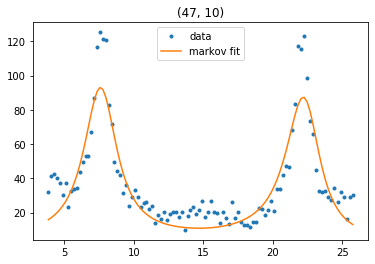

(48, 10)
                Co     Omega     Gamma             A         mu      sigma  \
Values    0.020341  7.668681  0.465424  1.024276e+02  10.959030  16.752355   
StdErrs   0.009195  0.051380  0.032044  1.924991e+08   5.323101  12.772923   
Initials  0.021539  7.681288  0.473828  1.277168e+02  10.850525  16.735620   

             shift    offset  
Values    0.243557  2.000000  
StdErrs   0.033462  1.254354  
Initials  0.215497  2.000000  


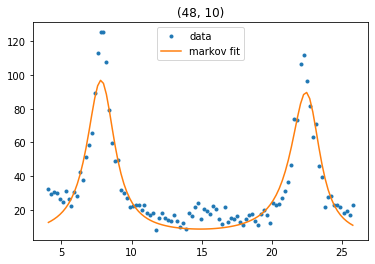

(49, 10)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.012139  7.828831  0.205284        0.798051     0.076905   
StdErrs   0.004102  0.042706  0.026375        0.009557     0.010655   
Initials  0.011461  7.489025  0.149103        0.860032     0.072864   

          delta_amplitude             A         mu      sigma     shift  \
Values           0.459861  3.528407e+03  -7.046912  17.984007  0.027498   
StdErrs          0.027322  3.337524e+09  26.393179  11.069257  0.042563   
Initials         0.365699  2.940339e+03  -7.118093  17.966041  0.183689   

            offset  
Values    2.000000  
StdErrs   1.990009  
Initials  2.000000  


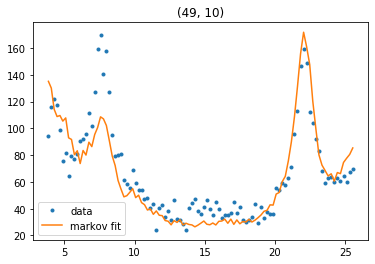

(50, 10)
                Co     Omega     Gamma             A         mu      sigma  \
Values    0.031568  7.472898  0.793353  6.037267e+01  11.383157  16.924990   
StdErrs   0.009695  0.091393  0.058733  8.397924e+07   3.570384   9.615313   
Initials  0.019820  7.664628  0.417777  7.546574e+01  11.270453  16.908082   

             shift    offset  
Values    0.016960  2.000000  
StdErrs   0.043195  3.027948  
Initials  0.089943  2.000000  


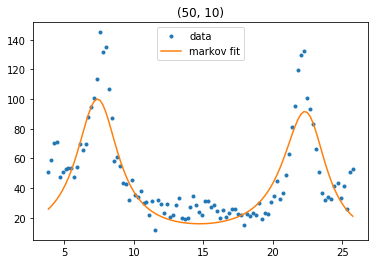

(51, 10)
                Co     Omega     Gamma             A         mu      sigma  \
Values    0.023830  7.593555  0.560413  6.292414e+01  10.739871  16.718851   
StdErrs   0.009308  0.061580  0.038247  9.820074e+07   4.937175  11.193752   
Initials  0.016252  7.722079  0.276374  5.243679e+01  10.633536  16.702149   

             shift    offset  
Values    0.257121  2.000000  
StdErrs   0.034751  1.686826  
Initials  0.224900  2.000000  


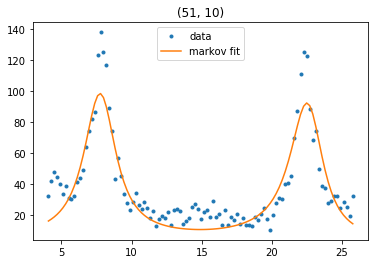

(52, 10)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.011898  7.801811  0.210109        0.928263     0.081146   
StdErrs   0.003529  0.044459  0.027600        0.010936     0.011905   
Initials  0.011329  7.749511  0.202510        0.983358     0.076607   

          delta_amplitude             A         mu      sigma     shift  \
Values           0.489857  2.497441e+03  -6.568183  18.110273  0.053916   
StdErrs          0.029936  2.934066e+09  22.484874   9.810366  0.045485   
Initials         0.298548  3.121478e+03  -6.634528  18.092181  0.100399   

            offset  
Values    2.000000  
StdErrs   1.915669  
Initials  2.000000  


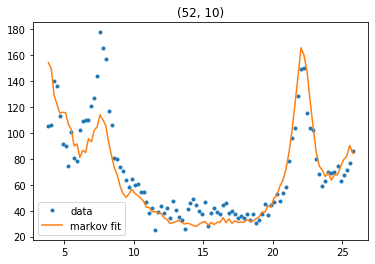

(53, 10)
                Co     Omega     Gamma             A         mu      sigma  \
Values    0.024442  7.647378  0.565984  5.341386e+01  10.812053  16.857374   
StdErrs   0.009321  0.060427  0.038840  6.774926e+07   5.061758  11.139405   
Initials  0.019361  7.727317  0.368220  6.676732e+01  10.705003  16.840534   

             shift    offset  
Values    0.030276  2.000000  
StdErrs   0.033546  1.695473  
Initials  0.225567  2.000000  


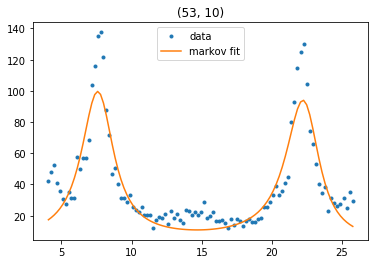

(54, 10)
                Co     Omega     Gamma             A         mu      sigma  \
Values    0.017128  7.704408  0.317022  1.249794e+02  10.907580  16.857391   
StdErrs   0.010426  0.035320  0.021769  2.611267e+08   7.840101  17.155103   
Initials  0.014359  7.747597  0.222968  1.043225e+02  10.799584  16.840551   

             shift    offset  
Values    0.007238  2.000000  
StdErrs   0.025369  0.793432  
Initials  0.016907  2.000000  


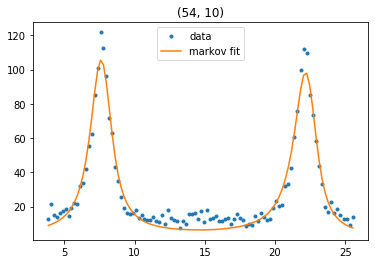

(55, 10)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.012462  7.788318  0.180601        0.786494     0.062217   
StdErrs   0.004595  0.035714  0.021695        0.005699     0.006700   
Initials  0.011082  7.572230  0.146358        0.860965     0.106875   

          delta_amplitude             A         mu      sigma     shift  \
Values           0.334743  2.613079e+03  -6.309370  18.182823  0.017048   
StdErrs          0.020689  3.080615e+09  28.982867  12.654702  0.034983   
Initials         0.558662  2.886333e+03  -6.373101  18.164658  0.199517   

            offset  
Values    2.000000  
StdErrs   1.498019  
Initials  2.000000  


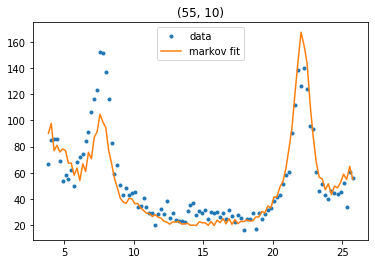

(57, 10)
                Co     Omega     Gamma             A         mu      sigma  \
Values    0.027951  7.623852  0.678973  3.938750e+01  11.363576  16.941830   
StdErrs   0.009218  0.072284  0.047809  5.169437e+07   3.811816   9.955507   
Initials  0.031476  7.478803  0.791934  3.282292e+01  11.251066  16.924905   

             shift    offset  
Values    0.004498  2.000000  
StdErrs   0.037589  2.266776  
Initials  0.078448  2.000000  


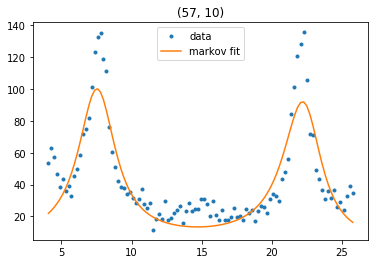

(58, 10)
                Co     Omega     Gamma             A         mu      sigma  \
Values    0.018226  7.779511  0.336930  3.198305e+02  10.833096  16.840483   
StdErrs   0.010605  0.036067  0.022849  6.064310e+08   7.130575  16.262211   
Initials  0.017017  7.767681  0.281519  3.997699e+02  10.913042  16.857341   

             shift    offset  
Values    0.247753  2.000000  
StdErrs   0.026192  0.863249  
Initials  0.243843  2.000000  


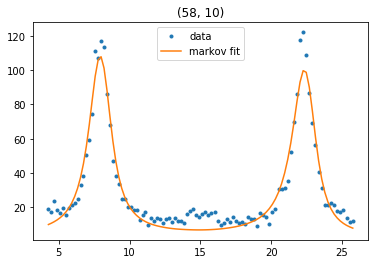

(59, 10)
                Co     Omega     Gamma             A         mu      sigma  \
Values    0.031011  7.522243  0.763954  3.837966e+02  10.941427  16.857324   
StdErrs   0.010438  0.091935  0.056107  5.471248e+08   4.111489  10.364271   
Initials  0.018226  7.779511  0.336930  3.198305e+02  10.833096  16.840483   

             shift    offset  
Values    0.279620  2.000000  
StdErrs   0.043757  2.964881  
Initials  0.247753  2.000000  


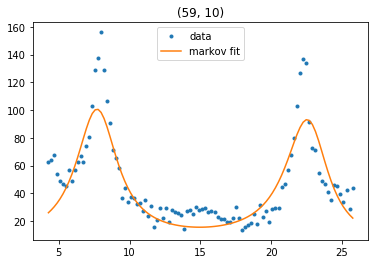

In [33]:
for ii in range(40,60):
    if hasattr(matrix[ii][10], 'y_markov_fit'):
        Plot_Elements_Spectrum(matrix, [(ii,10)], fit = 'markov')

In [64]:
from Alessandria import Get_Neighbours2D
Plot_Elements_Spectrum(matrix, Get_Neighbours2D(), fit = 'markov')

TypeError: Get_Neighbours2D() missing 4 required positional arguments: 'ii_0', 'jj_0', 'n_rows', and 'n_cols'

In [65]:
no_delta = []
for (ii, jj) in boni:
    if not 'delta_position' in matrix[ii][jj].Markov_Fit_Params.keys():
        no_delta.append((ii,jj))
print(len(no_delta))


7289


In [65]:
print(len(no_delta))
print(len(boni)-len(no_delta))
special = []
for (ii, jj) in boni:
    if ((ii,jj) not in no_delta) & ((ii,jj) not in markov_gamma_too_high):
        special.append((ii,jj))
print(len(special))

NameError: name 'no_delta' is not defined

(0, 0)
                Co     Omega     Gamma             A         mu      sigma  \
Values    0.015446  7.332734  0.222923  5.455538e+03  11.842649  16.774011   
StdErrs   0.011839  0.026806  0.016257  1.285001e+10   7.596574  21.844203   
Initials  0.010000  7.661468  0.100000  4.546282e+03  11.962272  16.790802   

             shift    offset  
Values    0.022905  2.000000  
StdErrs   0.022673  0.598723  
Initials  0.000000  0.000000  


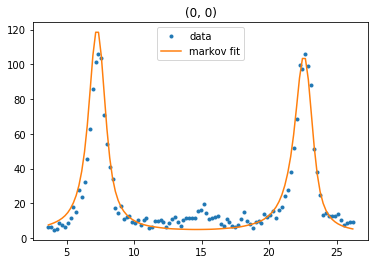

(0, 1)


ValueError: x and y must have same first dimension, but have shapes (108,) and (107,)

In [67]:
Plot_Elements_Spectrum(matrix, no_delta[:10], fit = 'markov')

In [68]:
Plot_Elements_Spectrum(matrix, markov_gamma_too_high, fit = 'markov')

(24, 79)


ValueError: x and y must have same first dimension, but have shapes (104,) and (108,)

(1, 39)
                Co     Omega     Gamma             A         mu      sigma  \
Values    0.012176  7.353046  0.147601  1.234685e+03   9.996658  16.674727   
StdErrs   0.016422  0.021774  0.014757  2.630851e+09  20.652526  37.575181   
Initials  0.012051  7.340372  0.153975  1.543357e+03   9.897681  16.658069   

             shift    offset  
Values    0.204923  2.000000  
StdErrs   0.020329  0.592341  
Initials  0.198649  2.000000  


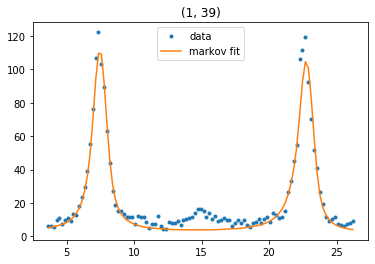

(1, 38)
                Co     Omega     Gamma             A         mu      sigma  \
Values    0.012379  7.352028  0.151229  9.877494e+02  10.096625  16.691402   
StdErrs   0.016140  0.020423  0.013729  1.820258e+09  19.489924  36.418038   
Initials  0.012176  7.353046  0.147601  1.234685e+03   9.996658  16.674727   

             shift    offset  
Values    0.220546  2.000000  
StdErrs   0.020077  0.596835  
Initials  0.204923  2.000000  


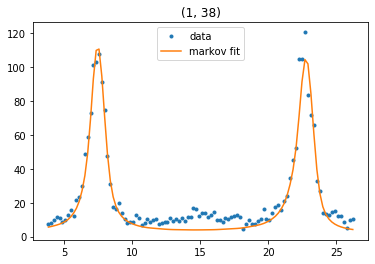

(1, 37)
                Co     Omega     Gamma             A         mu      sigma  \
Values    0.012588  7.349645  0.149044  1.184911e+03   9.995658  16.708093   
StdErrs   0.016602  0.020216  0.013601  3.013598e+09  20.406440  37.020303   
Initials  0.012379  7.352028  0.151229  9.877494e+02  10.096625  16.691402   

             shift    offset  
Values    0.193161  2.000000  
StdErrs   0.020226  0.564608  
Initials  0.220546  2.000000  


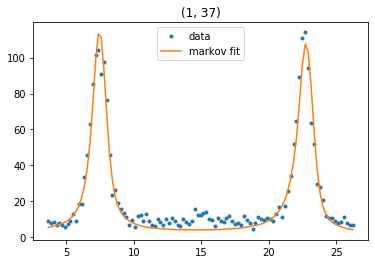

(1, 36)


ValueError: x and y must have same first dimension, but have shapes (107,) and (106,)

In [69]:
Plot_Elements_Spectrum(matrix, boni[130:140], fit = 'markov')

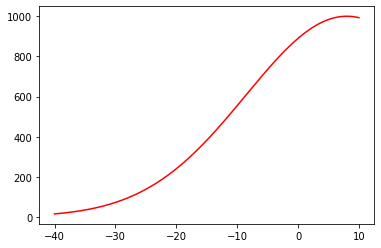

,mu,sigma
Values,8.016360,16.584640
StdErrs,23.176792,29.718108
Initials,7.936990,16.568072


In [70]:
plt.figure()
x = np.linspace(-40, 10, 5000)
for (ii,jj) in boni[-1:]:
    plt.plot(x, gaussian(x, 1000, *matrix[ii][jj].Markov_Fit_Params[list(cols_gauss)].values[0][1:]), c = 'r')
    plt.show()
matrix[ii][jj].Markov_Fit_Params[['mu', 'sigma']]


In [71]:
################ TOTALE

with open(now_path+'y_tot_fit.txt', 'r') as fin:
    y_fits = fin.readlines()

with open(now_path+'cost_tot.txt', 'r') as fin:
    costi = fin.readlines()
with open(now_path+'tot_fit_params.txt', 'r') as fin:
    lines   =   fin.readlines()

if (len(boni) != len(lines)):
    raise ValueError("Incompatibilità tra lunghezza file parametri ({}) e informazioni fit ({})".format(len(boni), len(lines)))

for (line, y_fit, cost, (ii,jj)) in zip(lines, y_fits, costi,  boni) :
#for (line, cost, (ii,jj)) in zip(lines, costi,  boni) :
    matrix[ii][jj].Recover_Tot_Fit_Params(line)
    matrix[ii][jj].Recover_y_fit(np.array(y_fit[1:-2].split(), dtype = float))
    matrix[ii][jj].Recover_cost_tot(float(cost))

print('Ok ho recuperato le informazioni del Fit Totale')

FileNotFoundError: [Errno 2] No such file or directory: '../BRILLOUIN/TDP43/ARS_13_02/analysis_new_nodelta_better/y_tot_fit.txt'

In [72]:
#HISTOGRAMs
tot_Omegas = np.array([matrix[ii][jj].Tot_Fit_Params['Omega'].values[0] for (ii,jj) in boni])
tot_Gammas =  np.array([matrix[ii][jj].Tot_Fit_Params['Gamma'].values[0] for (ii,jj) in boni])
taus       = np.array([matrix[ii][jj].Tot_Fit_Params['tau'].values[0] for (ii,jj) in boni])

plt.figure()
plt.title('Omega distribution over sample - tot')
_ = plt.hist(tot_Omegas, bins = 50, label = 'omega',histtype = 'bar', stacked = True, rwidth= 0.8,  color = 'maroon')
plt.legend(title='Mean = {:3.2f}\nStd = {:3.2f}'.format(np.mean(tot_Omegas), np.std(tot_Omegas)))
plt.savefig(now_path+'Omega_tot_distribution.pdf', format = 'pdf', bbox_inches='tight')
plt.show()
plt.close()
plt.figure()
plt.title('Gamma distribution over sample - tot ')
_ = plt.hist(tot_Gammas, bins = 50, label = 'gamma', histtype = 'bar', stacked = True, rwidth= 0.8)
plt.legend(title='Mean = {:3.2f}\nStd = {:3.2f}'.format(np.mean(tot_Gammas), np.std(tot_Gammas)))
plt.savefig(now_path+'Gamma_tot_distribution.pdf', format = 'pdf', bbox_inches='tight')
plt.show()
plt.close()
plt.figure()
plt.title('Tau distribution over sample - tot')
_ = plt.hist(taus, bins = 50, label = 'gamma', histtype = 'bar', stacked = True, rwidth= 0.8, color = 'darkgoldenrod')
plt.legend(title='Mean = {:3.2f}\nStd = {:3.2f}'.format(np.mean(taus), np.std(taus)))
plt.savefig(now_path+'tau_tot_distribution.pdf', format = 'pdf', bbox_inches='tight')
plt.show()
plt.close()


AttributeError: 'Spectrum' object has no attribute 'Tot_Fit_Params'

In [73]:
#Parametri di Interesse per analisi
tot_too_bad = ()
tot_too_good  = ()
tot_omega_too_high =  ()
tot_gamma_too_bad = ()
tau_not_bad = []

tot_omega_max = np.mean(tot_Omegas)+5*np.std(tot_Omegas)
tot_gamma_max = np.mean(tot_Gammas)+5*np.std(tot_Gammas)
cost_max = 1000
cost_min = 50


tot_too_bad = Get_Bad_Elements(matrix, boni, cost_max, fit = 'tot')
tot_too_good = Get_Good_Elements(matrix, boni, cost_min, fit = 'tot')
tot_omega_too_high = Whose_Param_Too_High('Omega', tot_omega_max, 'markov', matrix, boni)
tot_gamma_too_high = Whose_Param_Too_High('Gamma', tot_gamma_max, 'markov', matrix, boni)


#aggiunte 
omega_different_from_mark = []
gamma_different_from_mark = []

percentage_diff = 0.8
tot_too_offset = ()
percentage_gamma = 100
max_offset = 30
almost_height = ()

for (ii,jj) in boni:
    
    perc_omega = matrix[ii][jj].Tot_Fit_Params['Omega'].values[0]*percentage_diff/100
    perc_gamma = matrix[ii][jj].Tot_Fit_Params['Omega'].values[0]*percentage_diff/100

    if (matrix[ii][jj].Tot_Fit_Params['Omega'].values[0] > matrix[ii][jj].Markov_Fit_Params['Omega'].values[0] + perc_gamma) | (matrix[ii][jj].Tot_Fit_Params['Omega'].values[0] < matrix[ii][jj].Markov_Fit_Params['Omega'].values[0] - perc_gamma):
        omega_different_from_mark.append((ii,jj))
    if (matrix[ii][jj].Tot_Fit_Params['Gamma'].values[0] > matrix[ii][jj].Markov_Fit_Params['Gamma'].values[0] + perc_gamma) | (matrix[ii][jj].Tot_Fit_Params['Gamma'].values[0] < matrix[ii][jj].Markov_Fit_Params['Gamma'].values[0] - perc_omega):
        gamma_different_from_mark.append((ii,jj))
    if matrix[ii][jj].Tot_Fit_Params.T.StdErrs['Gamma'] > (matrix[ii][jj].Tot_Fit_Params.T.Values['Gamma']*(percentage_gamma/100)):
        tot_gamma_too_bad += ((ii,jj),)
    if matrix[ii][jj].Tot_Fit_Params['offset'].values[0] > max_offset:
        tot_too_offset += ((ii,jj),)
    if matrix[ii][jj].y.max() > 15000:
        tot_almost_height += ((ii,jj),)
    if matrix[ii][jj].Tot_Fit_Params['tau']['StdErrs'] < matrix[ii][jj].Tot_Fit_Params['tau']['Values']:
        tau_not_bad.append((ii,jj))


print('\n\n\n\nHo trovato per i dati fit markov in {} :\n'.format(now_path))

print('{} elementi con chi quadro > {} '.format(len(tot_too_bad), cost_max))
print('{} elementi con chi quadro < {} \n'.format(len(tot_too_good), cost_min))


print('{} elementi con Omega > Omega max {:3.2f}'.format(len(tot_omega_too_high), tot_omega_max))
print('{} elementi con Gamma > Gamma max {:3.2f}\n'.format(len(tot_gamma_too_high), tot_gamma_max))


print('{} elementi con Gamma con errore percentuale > {} \n'.format(len(markov_gamma_too_bad), percentage_gamma))
print('{} elementi con offset > {} \n'.format(len(tot_too_offset), max_offset))

print('{} elementi il cui fit tot di Omega è diverso del {} percento da markoviano'.format(len(omega_different_from_mark), percentage_diff))
print('{} elementi il cui fit tot di Gamma è diverso del {} percento da markoviano'.format(len(gamma_different_from_mark), percentage_diff))
print('{} elementi il cui fit di tau non è cosi male..'.format(len(tau_not_bad)), tau_not_bad)


NameError: name 'tot_Omegas' is not defined

In [74]:
Plot_Elements_Spectrum(matrix, tau_not_bad[:10], fit = 'tot')

In [75]:
omega_tot_map, _ = Get_Parameter_Map('tot', 'Omega', matrix, n_rows, n_cols, excluded, 'jet', 7.35, 8., fig = 'omega_tot_map', path=now_path)
Delta_omega_tot_map, _ = Get_Parameter_Map('tot', 'Omega', matrix, n_rows, n_cols, excluded, 'jet', 0,0.7, fig = 'Delta_omega_tot_map', path=now_path, Deltas = True)
gamma_tot_map, _ = Get_Parameter_Map('tot', 'Gamma', matrix, n_rows, n_cols, excluded, 'jet', 0.1,0.25, fig = 'Gamma_tot_map', path=now_path)
Delta_gamma_tot_map, _ = Get_Parameter_Map('tot', 'Gamma', matrix, n_rows, n_cols, excluded, 'jet', 0,0.05, fig = 'Delta_gamma_tot_map', path=now_path, Deltas = True)
tau_map, _ = Get_Parameter_Map('tot', 'tau', matrix, n_rows, n_cols, excluded, 'jet', 0., 200, fig = 'tau_map', path=now_path)
Delta_tau_map, _ = Get_Parameter_Map('tot', 'tau', matrix, n_rows, n_cols, excluded, 'jet', 0,0.7, fig = 'Delta_tau_map', path=now_path, Deltas = True)

AttributeError: 'Spectrum' object has no attribute 'Tot_Fit_Params'

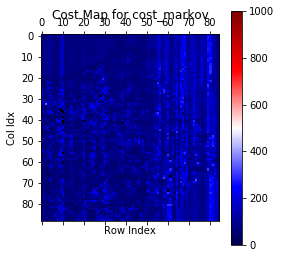

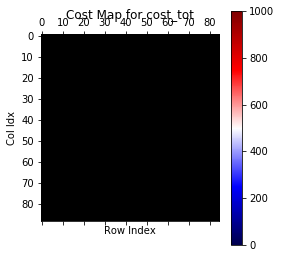

In [76]:
markov_cost_map = Get_cost_map(matrix, 'markov', len(rows), len(cols), 'markov_cost_map', path = now_path)
tot_cost_map = Get_cost_map(matrix, 'tot', len(rows), len(cols), 'tot_cost_map', path = now_path)


In [54]:
def Get_Parameter_Map(fit, parameter, matrix, n_rows, n_cols, excluded, cmap, inf, sup, analysis_dir, spectra_filename, Deltas = False,  fig = False, path = './'):


    if fit == 'markov':
        fit_params = 'Markov_Fit_Params'
    elif fit == 'tot':
        fit_params = 'Tot_Fit_Params'
    else:
        raise ValueError ("Specify which fit to verify: 'markov' or 'tot \n")
    if Deltas:
        value = 'StdErrs'
    else:
        value = 'Values'

    p_map   =   np.zeros((n_rows, n_cols))
    nans = ()
    for ii in range(n_rows):
        for jj in range (n_cols):
            if  (ii, jj) not in excluded:
                p_map[ii,jj]    =   getattr(matrix[ii][jj], fit_params)[parameter][value]
                if Deltas:
                    #rendo percentuale
                    p_map[ii,jj] = (100*p_map[ii,jj])/getattr(matrix[ii][jj], fit_params)[parameter]['Values']
            else:
                p_map[ii,jj]    = np.nan
                nans = nans +((ii,jj),)


    print('Completata Parameter_Map per '+parameter)
    print('Ho trovato {} elementi saturati'.format(len(nans)))

    if fig:
        f, ax = plt.subplots()

        cm = plt.get_cmap(cmap)
        cm.set_bad(color='k')
        mappa = ax.matshow(p_map, cmap = cmap)
        mappa.set_clim(inf, sup)
        plt.colorbar(mappa)
        
        ax.set_title('{}\n{} {} Map for {}'.format(spectra_filename, parameter, value, analysis_dir), pad = 3.5)
                #ax.set_xticklabels(plt.xticks()[1])
        ax.tick_params('x', bottom = True, top = True, labelbottom = True, labeltop = False)
        ax.tick_params('y', left = True, right = True)
        ax.set_xlabel('Row Index')
        ax.set_ylabel('Col Idx')
        plt.tight_layout()
        plt.savefig(path + fig+'.pdf', format = 'pdf', bbox_to_inches = 'tight')
        plt.show()

    return  (p_map, nans)

Completata Parameter_Map per Omega
Ho trovato 15 elementi saturati


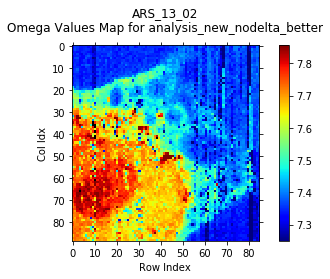

In [55]:
omega_markov_map, _ = Get_Parameter_Map('markov', 'Omega', matrix, n_rows, n_cols, excluded, 'jet', 7.25, 7.858, analysis_dir, spectra_filename, fig = 'omega_markov_map', path=now_path)